In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

warnings.filterwarnings("ignore")

dados = pd.read_csv('/content/drive/MyDrive/comics_data.csv')

Visualizando os dados

In [7]:
dados.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
title,'Mazing Man,'Mazing Man,'Mazing Man,'Mazing Man,'Mazing Man
title_link,/series/4036/0/dc-comics-mazing-man,/series/4036/0/dc-comics-mazing-man,/series/4036/0/dc-comics-mazing-man,/series/4036/0/dc-comics-mazing-man,/series/4036/0/dc-comics-mazing-man
issue_link,https://comicbookrealm.com/series/4036/54341/d...,https://comicbookrealm.com/series/4036/54350/d...,https://comicbookrealm.com/series/4036/54351/d...,https://comicbookrealm.com/series/4036/54352/d...,https://comicbookrealm.com/series/4036/54342/d...
cover_link,/cover-scan/acb40c8a57d50781194e37be2a94b3d5/l...,/cover-scan/293f4e231eccb71ad6e6bc3fe3e49c4f/l...,/cover-scan/45c7a284efa7d07f7bb5c9afb3080ffd/l...,/cover-scan/21764f5da802b25622831976f1619aa4/l...,/cover-scan/3a4df503a1fb2450b1227f4c1f0c45d9/l...
issue,# 1,# 10,# 11,# 12,# 2
cover_date,Jan '86,Oct '86,Nov '86,Dec '86,Feb '86
cover_price,$0.75,$0.75,$0.75,$0.75,$0.75
current_value,$3.00,$3.00,$3.00,$4.00,$3.00
hist_prices_link,/comic.php?a=historical&comic=54341?keepThis=t...,/comic.php?a=historical&comic=54350?keepThis=t...,/comic.php?a=historical&comic=54351?keepThis=t...,/comic.php?a=historical&comic=54352?keepThis=t...,/comic.php?a=historical&comic=54342?keepThis=t...


In [8]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,461301.0,230650.000000,133166.272601,0.0,115325.0,230650.0,345975.0,461300.0
searched,461301.0,472.510892,1832.640726,0.0,46.0,119.0,343.0,224080.0
owned,461301.0,54.493832,157.031092,0.0,1.0,6.0,33.0,6478.0
pages,208011.0,53.804641,195.457862,0.0,32.0,32.0,36.0,75960.0
rating,461301.0,0.378575,1.217336,0.0,0.0,0.0,0.0,5.0
rating_count,461301.0,0.141645,0.582849,0.0,0.0,0.0,0.0,15.0
pub_id,461301.0,1389.146538,1766.452783,1.0,2.0,559.0,2960.0,8253.0
issues_total,456401.0,105.147651,215.981536,1.0,8.0,28.0,99.0,1801.0
pub_titles_total,461301.0,2039.691928,2620.827222,1.0,91.0,517.0,4688.0,7285.0
pub_issues_total,461301.0,20774.509437,25262.635323,0.0,811.0,6574.0,57043.0,65535.0


# DATA CLEANING

In [9]:
dados.drop(['title_link','issue_link','cover_link','hist_prices_link'],axis=1,inplace=True)

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461301 entries, 0 to 461300
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          461301 non-null  int64  
 1   title               461301 non-null  object 
 2   issue               461301 non-null  object 
 3   cover_date          369712 non-null  object 
 4   cover_price         461301 non-null  object 
 5   current_value       461301 non-null  object 
 6   searched            461301 non-null  int64  
 7   owned               461301 non-null  int64  
 8   pages               208011 non-null  float64
 9   rating              461301 non-null  float64
 10  rating_count        461301 non-null  int64  
 11  ISBN-UPC            197912 non-null  object 
 12  est_print_run       30446 non-null   object 
 13  variant_of          131457 non-null  object 
 14  preview             15563 non-null   object 
 15  synopsis            291190 non-nul

Transformando os dados para possibilitar as analises

*   title: objeto -> string
*   cover_date: objeto -> data 
*   cover_price: objeto -> float
*   current_value: objeto -> float







In [11]:
dados['title'] = dados.title.astype(str)

In [12]:
dados['cover_date'] = dados['cover_date'].str.replace('\D+','a', regex=True)
dados['cover_date'] = dados['cover_date'].str.strip('a')

In [13]:
dados = dados[dados.cover_date.isin(['']) ==False]
dados.cover_date.unique()

array(['86', '2007', '22', '75', '76', nan, '06', '16', '07', '12', '08',
       '64', '65', '02', '00', '47', '49', '50', '51', '52', '53', '48',
       '54', '55', '56', '57', '58', '59', '60', '04', '19', '17', '18',
       '99', '14', '10', '11', '05', '15', '13', '09', '20', '21', '2003',
       '94', '38', '39', '46', '91', '87', '90', '82', '97', '40', '61',
       '62', '63', '41', '66', '67', '68', '69', '70', '71', '72', '73',
       '74', '42', '77', '78', '79', '80', '81', '83', '84', '43', '85',
       '88', '89', '92', '44', '93', '95', '96', '98', '01', '03', '45',
       '1937', '1942', '2000', '2002', '2004', '2006', '1944', '1945',
       '1943', '1991', '1977', '1973', '1994', '2018', '2010', '1996',
       '1988', '1997', '2005', '1990', '1993', '1999', '1995', '1998',
       '2001', '1992', '2019', '2008', '2009', '2015', '1981', '1966',
       '2012', '35', '1989', '1978', '2016', '1982', '2017', '1979',
       '1983', '1975', '1971', '2021', '37', '36', '1936', '

In [14]:
dados = dados[dados['cover_date'].notna()]
dados['cover_date'] = dados['cover_date'].astype(int)

In [15]:
dados['cover_date'] =  dados['cover_date'].apply(lambda x: x+2000 if 0 <= x < 23  else x)
dados['cover_date'] =  dados['cover_date'].apply(lambda x: x+1900 if 22 < x < 100 else x)
#dados['cover_date'] =  dados['cover_date'].apply(lambda x: 2022-x if x >= 0 else x)

In [16]:
dados['cover_price'] = dados['cover_price'].str.replace('$', '', regex=True)
dados['cover_price'] = dados['cover_price'].str.replace(',', '', regex=True)
dados['cover_price'] = dados['cover_price'].str.replace('Free', '0.00', regex=True)
dados['cover_price'] = dados.cover_price.astype(float)

In [17]:
dados['current_value'] = dados['current_value'].str.replace('$', '', regex=True)
dados['current_value'] = dados['current_value'].str.replace(',', '', regex=True)
dados['current_value'] = dados.current_value.astype(float) 

In [18]:
dados.reset_index(drop = True, inplace = True)

In [19]:
dados.query("pages > 10000 ")

,Unnamed: 0,title,issue,cover_date,cover_price,current_value,searched,owned,pages,rating,...,contributors_names,contributors_roles,characters,pub_id,volume,years,issues_total,pub_name,pub_titles_total,pub_issues_total
135293,158438,Warhammer 40000: Marneus Calgar,# 1-2nd print,2021,4.99,5.0,319,0,75960.0,0.0,...,no contributors assigned,no contributors assigned,no characters assigned,2.0,NaN,2020 - 2021,14.0,Marvel Comics,7285,65535


In [20]:
dados['pages'].iloc[135293] = 128

In [21]:
df1 = dados.copy()

O código abaixo, foi retirado de um notebook do kaggle. Manterei desta forma, pois não tenho expertisse suficiente ainda para usar regex dessa forma.  créditos: https://www.kaggle.com/iasonaskatechis/comic-data-cleaning-suggestion

In [22]:
prints = df1.issue.str.extract('.*(\d{1,2})[a-zA-Z]{2}[\s\-][pP]rint')
df1['print_nr'] = prints.fillna(1).astype(int)
# extract volume and issue information from issue of the type e.g. 'V5-14' or 'V9 6' or 'V12#6'
vols = (df1.issue.str.extractall('.*[Vv][oO]?[lL]?(\d+)[\s\-#]+(\d+)')
            .droplevel(1).rename({0: 'vol', 1: 'issue'}, axis=1))
# extract volume and issue information from issue of the type e.g. 'B-14' or 'C 6'
lett = df1.issue.str.extractall('([A-Z])[#\s\-](\d+)\s?.*').droplevel(1).rename({0: 'vol', 1: 'issue'}, axis=1)

In [23]:
# Find all ashcan issues
idx_ash = df1.issue.str.contains('[Aa]shcan')
# Find all non-numbered and ashcan issues
idx_nn = df1.issue.str.contains('(?:\s+|^)nn-?(?:\s*|$)')
df1.loc[idx_nn, 'volume'] = 'one-shot'
# Find all previews
idx_prev = df1.issue.str.contains('[Pp]review')
# find all issues that contain also the volume information
vols_idx = df1.issue.str.contains('.*[Vv][oO]?[lL]?#?\d+[\s\-#]+\d+')
# find issues that are properly numbered
numb_idx = df1.issue.str.contains('.*#\s*-?\d+\D*.*')
# find issues that are numbered as e.g. B-5 etc.
lett_idx = df1.issue.str.contains('^[A-Z][#\s\-]\d+\s?.*')
# find issues that are numbered by single capital letters
caplet_idx = df1.issue.str.contains('^[A-Z]$')
# find issues that are numbered by single lowercase letters
lowlet_idx = df1.issue.str.contains('^[a-z]$')
# find issues from free comic book day
fcbd_idx = df1.issue.str.contains('fcbd|free comic')
df1.loc[fcbd_idx, 'volume'] = 'fcbd'

# Extract issue numbers by the ones that are numbered in the conventional way
numbered = df1.issue.str.extract(r'#\s*(\d+)\D*')

# give numberical values to non-numbered special-type issues. This is just a convention
# ashcan --> -1
numbered.loc[idx_ash] = str(0)
# nn --> 1
numbered.loc[idx_nn] = str(1)
# preview --> 0.5
numbered.loc[idx_prev] = str(0.5)
# free comic book day (fcbd) --> 1
numbered.loc[fcbd_idx] = str(1)
# single capital letter numbering to int numbers
numbered.loc[caplet_idx] = df1[caplet_idx].issue.apply(lambda x: str(ord(x) - 64)).values.reshape(-1, 1)
# single lower letter numbering to int numbers
numbered.loc[lowlet_idx] = df1[lowlet_idx].issue.apply(lambda x: str(ord(x) - 96)).values.reshape(-1, 1)

# add volume and issue info extracted from issue column
numbered.loc[vols_idx, 0] = vols.issue 
df1.loc[vols_idx, 'volume'] = vols.vol
numbered.loc[lett_idx, 0] = lett.issue
df1.loc[lett_idx, 'volume'] = lett.vol.apply(lambda x: str(ord(x) - 64))

# create new column with the issues numbers
df1.insert(4, 'issue_nr', pd.to_numeric(numbered[0]))

In [24]:
# find all the above
regex = r'(?:\s+|^)nn-?(?:\s*|$)|.*#\s*-?\d+\D*.*|[Aa]shcan|[Pp]review|.*[Vv]\d+\s?-?\s?\d+|[A-Z][\s-]\d+\s?.*|^[A-Z]$|fcbd|free comic|^[a-z]$'
idx_good = (df1.issue.str.contains(regex))

In [25]:
# All that remained that we will drop since issue number is considered essential
print(df1[~idx_good].shape)
print(df1[~idx_good].current_value.sum())

(1315, 28)
45452.0


In [26]:
dados = df1.dropna(subset=['issue_nr'])
# drop issues with issue_nr > 10000 - considered outliers
dados = dados[~(dados.issue_nr > 10000)]

fim do codigo usado. 

In [27]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,368201.0,223678.269768,133262.541913,0.0,112569.00,217846.00,337917.00,461300.0
cover_date,368201.0,1999.101738,21.591216,1930.0,1988.00,2007.00,2016.00,2022.0
issue_nr,368201.0,51.951210,195.980108,0.0,2.00,5.00,27.00,9312.0
cover_price,368201.0,4.603011,10.886459,0.0,0.25,2.99,3.99,1399.0
current_value,368201.0,120.736674,6068.848529,0.0,4.00,5.00,20.00,3000000.0
searched,368201.0,556.104011,2025.656608,0.0,57.00,149.00,420.00,224080.0
owned,368201.0,66.614496,173.320997,0.0,2.00,10.00,50.00,6478.0
pages,201979.0,52.566460,93.927223,0.0,32.00,32.00,36.00,8532.0
rating,368201.0,0.448865,1.312912,0.0,0.00,0.00,0.00,5.0
rating_count,368201.0,0.169147,0.635846,0.0,0.00,0.00,0.00,15.0


A partir dos dados já corrigidos podemos fazer algumas inferencias

1. Mais de 50% titulos forom publicados a partir de 2007, ou seja, mais de 150 mil publicações de menos de 15 anos. 
2. Podemos fazer uma linha do tempo com a evolução do preço(cover_price) de lançamento dos titulos. 
3. A variavel ratings(avaliações) possue muitos titulos com 0 de avaliações, o que demonstra que pode inferir que muitos titulos não são populares, e nem procurados. O que é corroborado pela variavel rating_counts(contagem de avaliações). Pois pelo menos de 75% da nosso conjunto de dados não tem sequer uma avaliação feita. Portanto, temos a possibilidade de excluir essa variavel de nossa analise a posterior. Podemos inferir que as avaliações nesse site não são muito utilizadas.
4. A variavel searched(buscas) pode ser utilizadas em analises variadas. 
5. current_value(valor atual) pode ser umas variavel alvo para um projeto de machine learning. Porem temos valores muito discrepantes. 
6. Owned(Donos) é a uma variavel a ser explorada, e que pode ter correlação com o valor atual.   

In [28]:
df_train2 = dados[['cover_price', 'current_value','cover_date', 'searched', 'owned', 'pages', 'issues_total','issue_nr']]

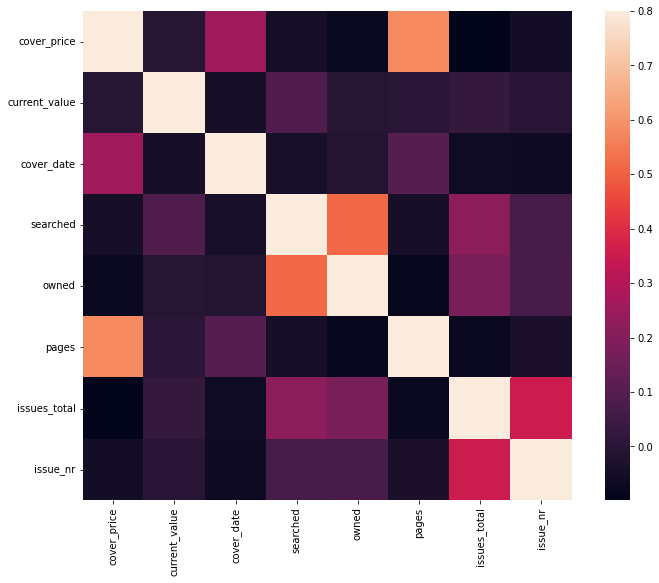

In [29]:
corrmat = df_train2.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [30]:
#utilizado quase como um group by
#posso fazer de forma diferente, ao inves de criar uma nova columa
#dados['title_issue'] = dados['title'] + ' ' + dados['issue']

In [31]:
#fazendo um groupby, para teste


Analisando os dados faltantes de todo o conjunto de dados

In [32]:
import missingno as msno

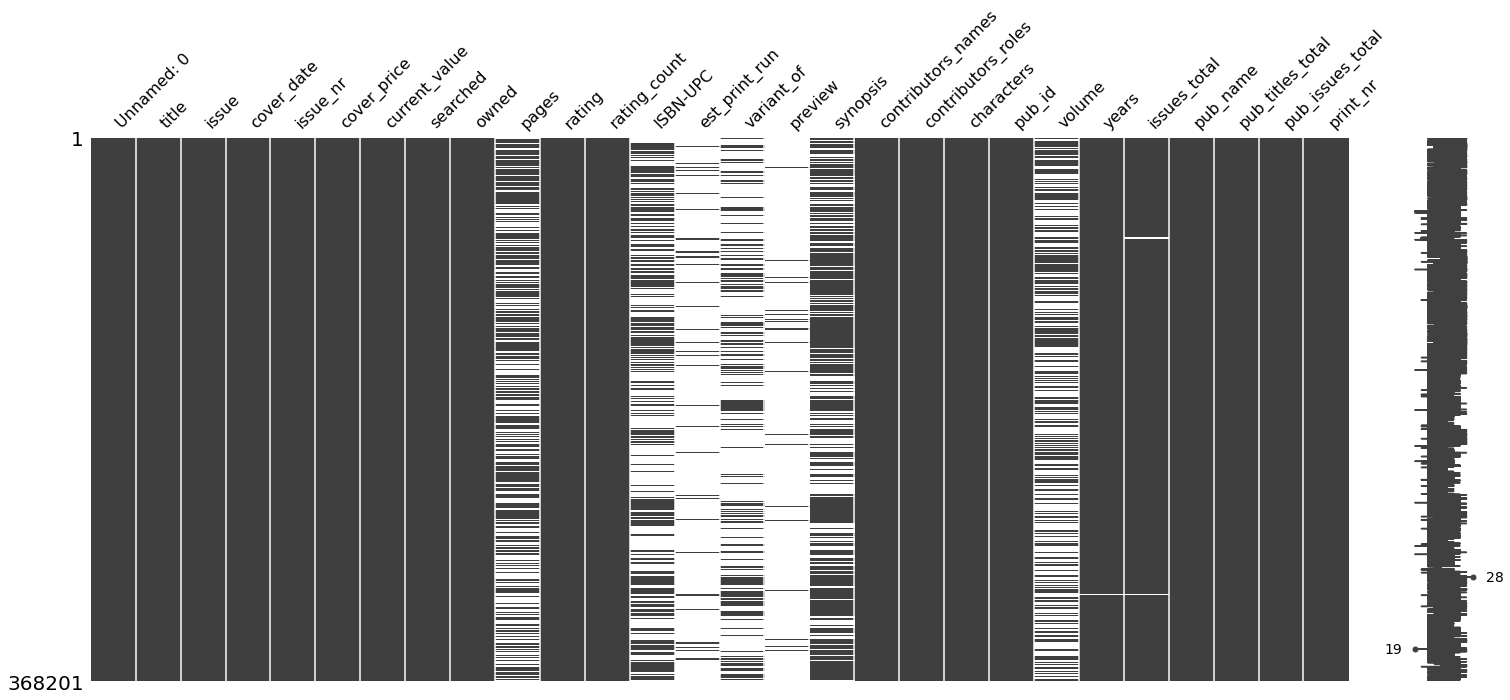

In [33]:
msno.matrix(dados);

Com isso podemos ter uma boa ideia do nosso conjunto de dados. 

1. as colunas de rating possuem valores zerados tanto para as colunas owned, rating, count_rating. E o que torna mais discrepante ainda é que no minimo 75% dos dados nas rating, count_rating são 0.

2. Vamos verificar a distribuição dos valores num histograma

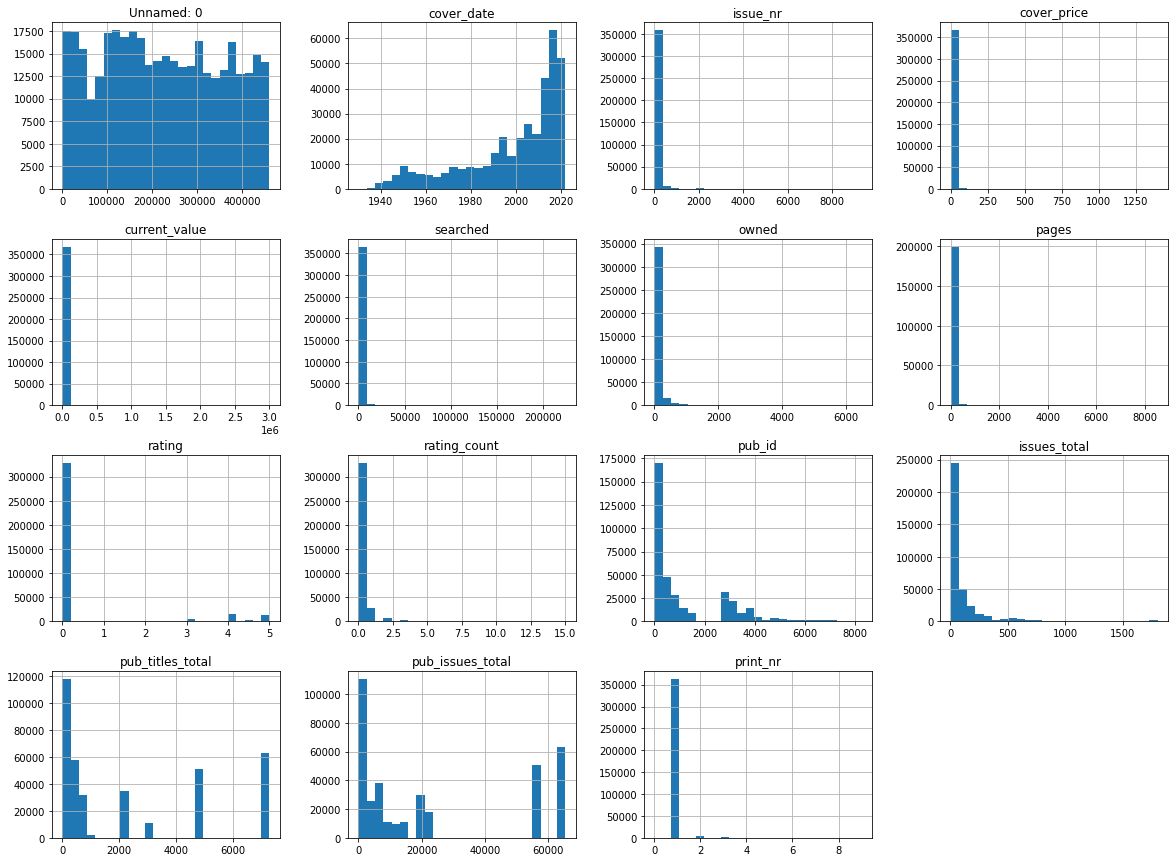

In [34]:
dados.hist(bins=25, figsize=(20,15));

In [35]:
df_teste = dados.copy()

In [36]:
df_teste.dropna(subset = ['pages'], inplace=True)
df_teste.dropna(subset = ['issues_total'], inplace=True)

In [37]:
df_teste.reset_index(drop = True)[:2]

,Unnamed: 0,title,issue,cover_date,issue_nr,cover_price,current_value,searched,owned,pages,...,contributors_roles,characters,pub_id,volume,years,issues_total,pub_name,pub_titles_total,pub_issues_total,print_nr
0,0,'Mazing Man,# 1,1986,1.0,0.75,3.0,1259,181,32.0,...,"['Pencils-CoverArt', 'Editor', 'Colors', 'Cove...","[[""'Mazing Man"", '/character-photos/character_...",1.0,NaN,1986,15.0,DC Comics,4688,57043,1
1,3,'Mazing Man,# 12,1986,12.0,0.75,4.0,670,96,22.0,...,"['Inks', 'Scripts-CoverArt', 'Colors', 'CoverA...","[[""'Mazing Man"", '/character-photos/character_...",1.0,NaN,1986,15.0,DC Comics,4688,57043,1


In [38]:
df_teste = df_teste.query('issue_nr <  2000')

In [39]:
#aplicando a transformação logaritimica
df_teste['cover_price'] = np.log(df_teste['cover_price']+1)
df_teste['current_value'] = np.log(df_teste['current_value']+1)
df_teste['issue_nr'] = np.log(df_teste['issue_nr']+1)
df_teste['issues_total'] = np.log(df_teste['issues_total']+1)
df_teste['searched'] = np.log(df_teste['searched']+1)
df_teste['pages'] = np.log(df_teste['pages']+1)                                       

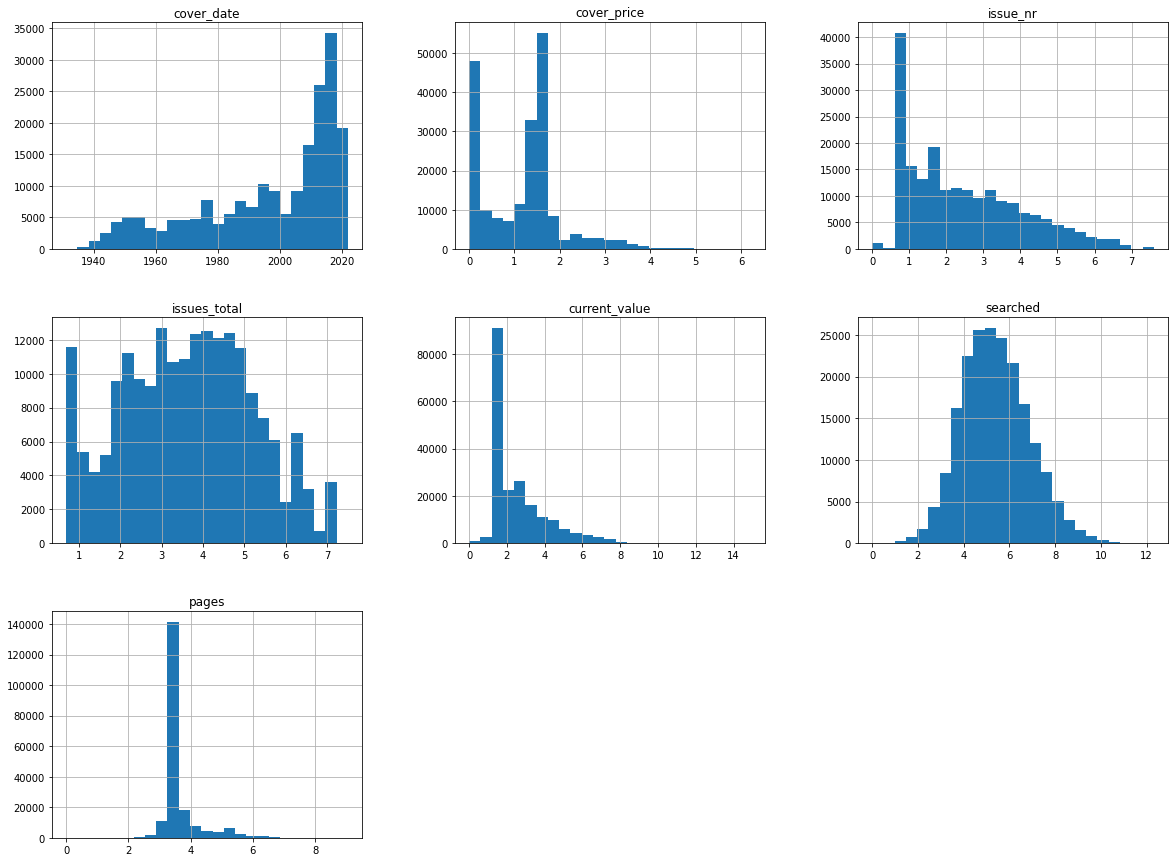

In [40]:
#verificando as distribuições após a transformação
df_log = df_teste[['cover_date','cover_price', 'issue_nr', 'issues_total','current_value','searched','pages']]
df_log.hist(bins=25, figsize=(20,15));

Ulalá, podemos ver melhor a distribuição dos nossos dados, porém fora a variável 'searched', todas as outras estão nada perto de uma distribuição normal, o que é ruim para aplicar um modelo de regressão linear. 

Temos duas possibilidades de uso de um modelo de regressão, prever 'current_value' ou 'cover_price'. Mas para isso preciso que as duas variaveis sejam melhores distribuidas. No caso deletar os valores discrepantes.

Ou posso também usar Gradient Boosting para passar por cima desses impecilhos.


Mas antes disso, vamos analisar o porque de termos valores tão altos e tão baixos em algums títulos. 

In [41]:
#scatterplot
#sns.set()
#cols = ['cover_date', 'cover_price', 'current_value','searched','issue_nr','pages', 'owned']
#sns.pairplot(dados[cols], size = 2.5)
#plt.show()

In [42]:
contagem = dados.title.value_counts().to_frame().reset_index().iloc[:10]
contagem_issue = dados.issue_nr.value_counts().to_frame().reset_index().iloc[:10]

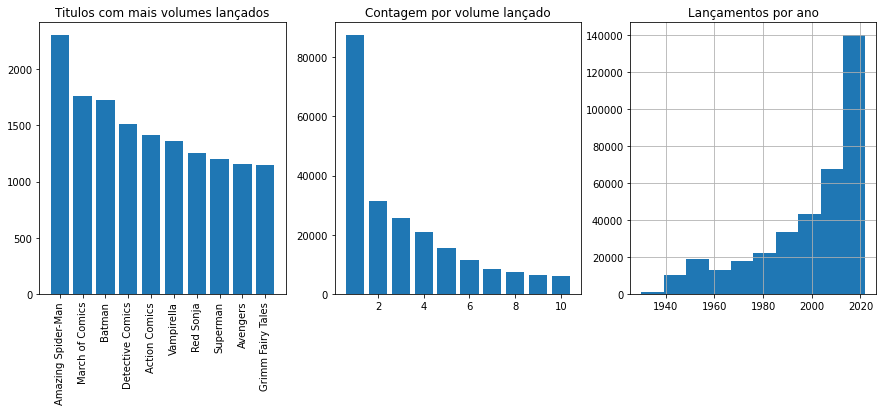

In [43]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
contagem.columns = ['title', 'Contagem']
plt.bar(x=contagem['title'], height=contagem['Contagem']);
plt.xticks(rotation = 90)
plt.title('Titulos com mais volumes lançados');


plt.subplot(1,3,2)
contagem_issue.columns = ['issue_nr', 'Contagem']
plt.bar(x=contagem_issue['issue_nr'], height=contagem_issue['Contagem'])
plt.title('Contagem por volume lançado');


plt.subplot(1,3,3)
dados.cover_date.hist()
plt.title('Lançamentos por ano')

plt.show()

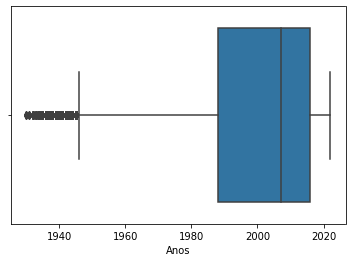

In [44]:
ax = sns.boxplot(x=dados.cover_date)
ax.set(xlabel='Anos')

plt.show();

# PAGES

In [45]:
dados.query('pages > 0').pages.describe()

count    201978.000000
mean         52.566720
std          93.927383
min           1.000000
25%          32.000000
50%          32.000000
75%          36.000000
max        8532.000000
Name: pages, dtype: float64

#SEARCHED

A distribuição das vezes que um Comics foi pesquisado, parece possuir muitos valores proximos de zero, vamos verificar:

In [46]:
print('igual à 0:  ', dados.query("searched == 0").searched.count())
print('maior que 1:', dados.query("searched > 1").searched.count())
print('maior que 50:', dados.query("searched > 50").searched.count())
print('maior que 500:', dados.query("searched > 500").searched.count())
print('maior que 5000:', dados.query("searched > 5000").searched.count())
print('maior que 50000:', dados.query("searched > 50000").searched.count())
print('maior que 100000:', dados.query("searched > 100000").searched.count())

igual à 0:   52
maior que 1: 368004
maior que 50: 287162
maior que 500: 79549
maior que 5000: 5635
maior que 50000: 86
maior que 100000: 8


In [47]:
dados.searched.describe()

count    368201.000000
mean        556.104011
std        2025.656608
min           0.000000
25%          57.000000
50%         149.000000
75%         420.000000
max      224080.000000
Name: searched, dtype: float64

# COMPARATIVO

In [48]:
comparativo = dados[['title','issue','searched','owned','cover_date','current_value','pub_name',]]
comparativo['title_issue'] = comparativo['title'] + ' ' + comparativo['issue']

comparativo.sort_values(by='owned', ascending=False)[:10];

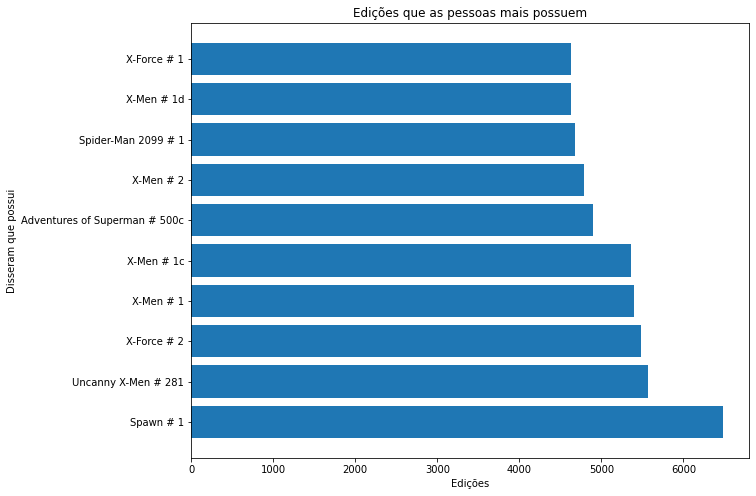

In [49]:
top_10_owned = comparativo[['title_issue','owned']]

plotar_top_10_owned = top_10_owned.sort_values(by= 'owned', ascending=False).iloc[:10,]

plt.figure(figsize= [10,8])
plt.barh(y = plotar_top_10_owned['title_issue'], width=plotar_top_10_owned.owned)
#plt.xticks(rotation = 80)
plt.ylabel('Disseram que possui');
plt.xlabel('Edições');
plt.title('Edições que as pessoas mais possuem');

In [50]:
comparativo.sort_values(by='searched', ascending=False)[:10]

,title,issue,searched,owned,cover_date,current_value,pub_name,title_issue
139148,X-Men,# 141,224080,1507,1981,125.0,Marvel Comics,X-Men # 141
132981,Uncanny X-Men,# 142,209227,1719,1981,50.0,Marvel Comics,Uncanny X-Men # 142
81888,Amazing Spider-Man,# 361,158604,3174,1992,225.0,Marvel Comics,Amazing Spider-Man # 361
133277,Uncanny X-Men,# 266,122915,2493,1990,200.0,Marvel Comics,Uncanny X-Men # 266
81777,Amazing Spider-Man,# 300,122602,2403,1988,800.0,Marvel Comics,Amazing Spider-Man # 300
80968,Amazing Spider-Man,# 1,113520,175,1963,62000.0,Marvel Comics,Amazing Spider-Man # 1
154584,Spawn,# 1,109188,6478,1992,30.0,Image Comics,Spawn # 1
133217,Uncanny X-Men,# 221,108420,2583,1987,75.0,Marvel Comics,Uncanny X-Men # 221
133250,Uncanny X-Men,# 244,97897,2562,1989,55.0,Marvel Comics,Uncanny X-Men # 244
81600,Amazing Spider-Man,# 252b,95788,2078,1984,250.0,Marvel Comics,Amazing Spider-Man # 252b


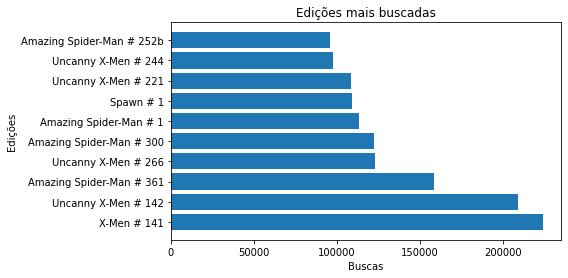

In [51]:
top_10 = comparativo[['title_issue','searched']]

plotar_top_10 = top_10.sort_values(by= 'searched', ascending=False).iloc[:10,]

plt.figure(figsize= [7,4])
plt.barh(y = plotar_top_10['title_issue'], width=plotar_top_10.searched)
plt.xlabel('Buscas');
plt.ylabel('Edições');
plt.title('Edições mais buscadas');

Comics mais valiosos segundo nossos dados

In [52]:
comparativo.sort_values(by='current_value', ascending=False)[:10];

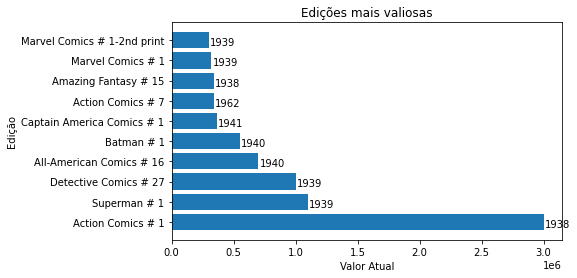

In [53]:
top_10_current_value = comparativo[['title_issue','current_value','cover_date']]

plotar_top_10_current_value = top_10_current_value.sort_values(by= 'current_value', ascending=False).iloc[:10,]
labelw = plotar_top_10_current_value['cover_date']
ys = plotar_top_10_current_value['title_issue']
xs = plotar_top_10_current_value.current_value

plt.figure(figsize= [7,4])
plt.barh(ys, xs)
plt.xlabel('Valor Atual');
plt.ylabel('Edição');
plt.title('Edições mais valiosas');

plt.annotate('1938', xy = ((3000000+10000),-0.25))
plt.annotate('1939', xy = ((1100000+10000), (1-0.25)))
plt.annotate('1939', xy = ((1000000+10000), (2-0.25)))
plt.annotate('1940', xy = ((700000+10000), (3-0.25)))
plt.annotate('1940', xy = ((550000+10000), (4-0.25)))
plt.annotate('1941', xy = ((365000+10000), (5-0.25)))
plt.annotate('1962', xy = ((340000+10000), (6-0.25)))
plt.annotate('1938', xy = ((340000+10000), (7-0.25)))
plt.annotate('1939', xy = ((320000+10000), (8-0.25)))
plt.annotate('1939', xy = ((300000+10000), (9-0.25)))


plt.show()

In [54]:
comparativo[['title','searched','owned','cover_date', 'current_value','pub_name']].sort_values(by='current_value', ascending = False).iloc[:10];
dados_finalizar = dados[['cover_date', 'current_value', 'searched', 'owned', 'issues_total','pub_issues_total']]
agrupado_title = dados.groupby('title')['searched', 'owned'].sum()

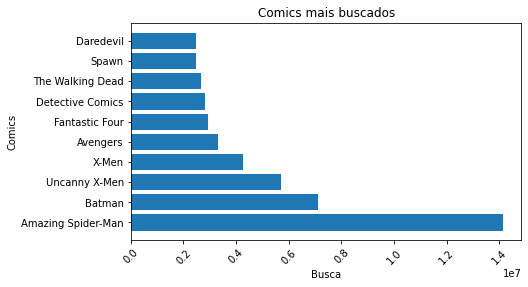

In [55]:
agrupado_title.reset_index(inplace=True)
agrupado_title_searched = agrupado_title.sort_values(by='searched', ascending=False).iloc[:10]

plt.figure(figsize= [7,4])
plt.barh(y = agrupado_title_searched['title'], width=agrupado_title_searched.searched)
plt.xticks(rotation = 45)
plt.xlabel('Busca');
plt.ylabel('Comics');
plt.title('Comics mais buscados');

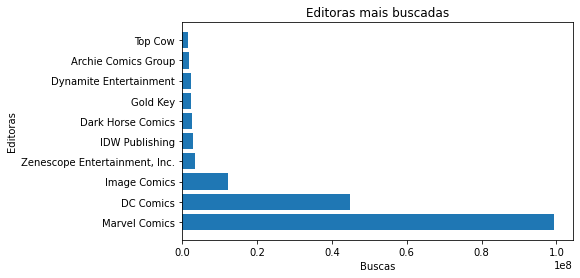

In [56]:
agrupado_pub_name = dados.groupby('pub_name')['searched', 'owned'].sum()
agrupado_pub_name.reset_index(inplace=True)
agrupado_pub_name_searched = agrupado_pub_name.sort_values(by='searched', ascending=False).iloc[:10]

plt.figure(figsize= [7,4])
plt.barh(y = agrupado_pub_name_searched['pub_name'], width=agrupado_pub_name_searched.searched)
plt.xlabel('Buscas');
plt.ylabel('Editoras');
plt.title('Editoras mais buscadas');

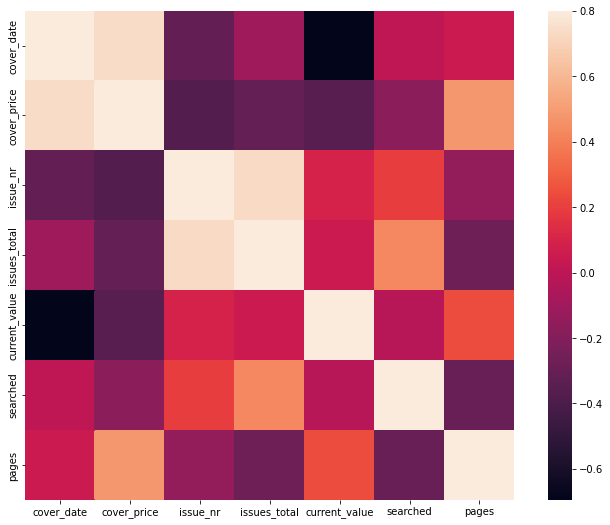

In [57]:
#matrix de correlação com os dados transformados
corrmat = df_log.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

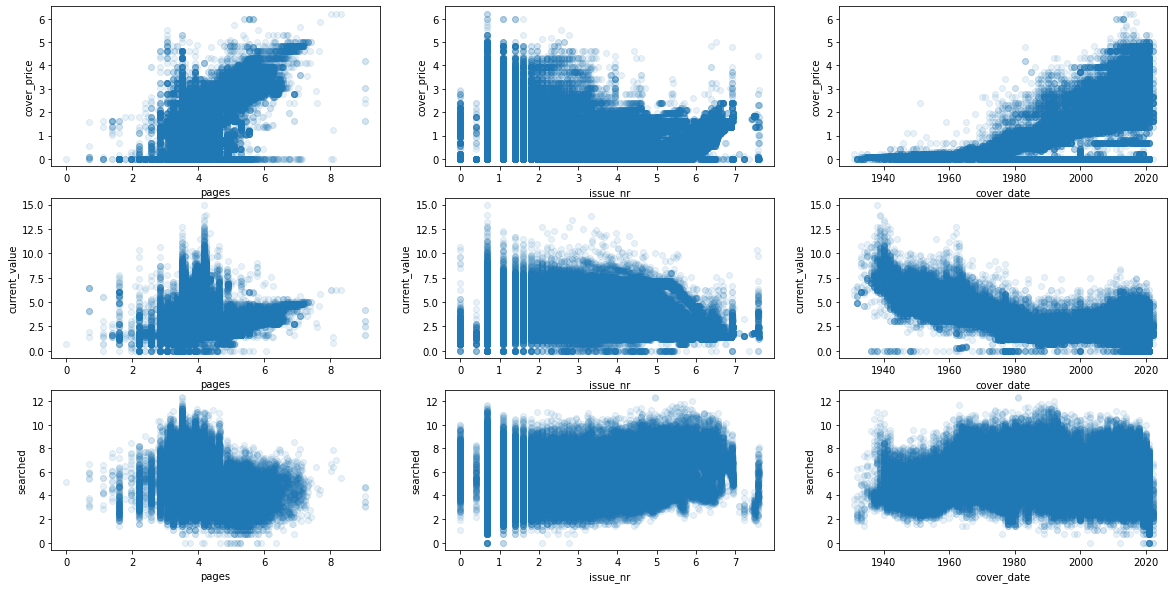

In [58]:
plt.figure(figsize= [20,10])
plt.subplot(3,3,1)

plt.scatter(x=df_log['pages'],y=df_log['cover_price'], alpha=0.1)
plt.ylabel('cover_price')
plt.xlabel('pages')

plt.subplot(3,3,2)
plt.scatter(x=df_log['issue_nr'],y=df_log['cover_price'], alpha=0.1)
plt.ylabel('cover_price')
plt.xlabel('issue_nr')

plt.subplot(3,3,3)
plt.scatter(x=df_log['cover_date'],y=df_log['cover_price'], alpha=0.1)
plt.ylabel('cover_price')
plt.xlabel('cover_date')

plt.subplot(3,3,4)
plt.scatter(x=df_log['pages'],y=df_log['current_value'], alpha=0.1)
plt.ylabel('current_value')
plt.xlabel('pages')

plt.subplot(3,3,5)
plt.scatter(x=df_log['issue_nr'],y=df_log['current_value'], alpha=0.1)
plt.ylabel('current_value')
plt.xlabel('issue_nr')

plt.subplot(3,3,6)
plt.scatter(x=df_log['cover_date'],y=df_log['current_value'], alpha=0.1)
plt.ylabel('current_value')
plt.xlabel('cover_date')

plt.subplot(3,3,7)
plt.scatter(x=df_log['pages'],y=df_log['searched'], alpha=0.1)
plt.ylabel('searched')
plt.xlabel('pages')

plt.subplot(3,3,8)
plt.scatter(x=df_log['issue_nr'],y=df_log['searched'], alpha=0.1)
plt.ylabel('searched')
plt.xlabel('issue_nr')

plt.subplot(3,3,9)
plt.scatter(x=df_log['cover_date'],y=df_log['searched'], alpha=0.1)
plt.ylabel('searched')
plt.xlabel('cover_date')


plt.show()

Text(0.5, 0, 'issues_total')

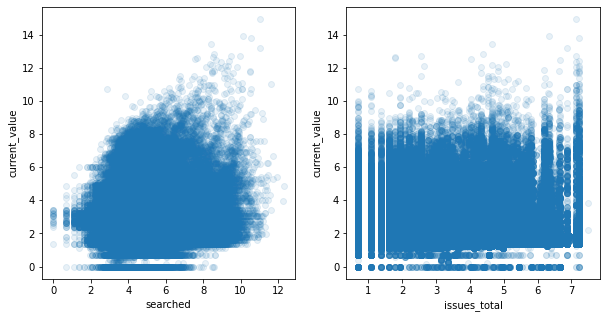

In [59]:
plt.figure(figsize= [10,5])

plt.subplot(1,2,1)
plt.scatter(x=df_log['searched'],y=df_log['current_value'], alpha=0.1)
plt.ylabel('current_value')
plt.xlabel('searched')

plt.subplot(1,2,2)
plt.scatter(x=df_log['issues_total'],y=df_log['current_value'], alpha=0.1)
plt.ylabel('current_value')
plt.xlabel('issues_total')

Agora parece que a variaveis se relacionam de alguma forma, que antes era dificil de observar

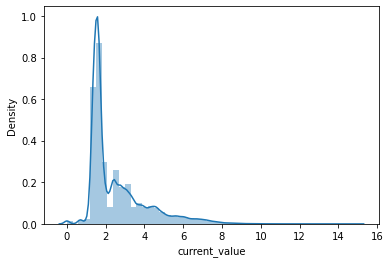

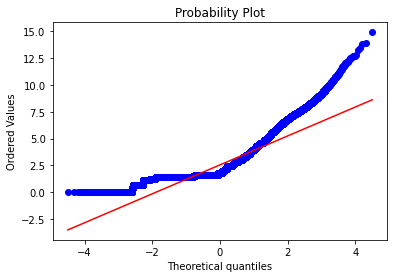

In [60]:
sns.distplot(df_log['current_value'], norm_hist= True)
fig = plt.figure()
res = stats.probplot(df_log['current_value'], plot=plt)

In [61]:
import xgboost
import math
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn import preprocessing
from sklearn import metrics

Usando XGboost para prever a variável current_value

In [62]:
dados_finalizar2 = df_log.copy()

In [63]:
X2 = dados_finalizar2[['cover_date','searched','pages']]
y2 = dados_finalizar2['current_value']

In [64]:
# Vamos tentar usar o algoritimo XGboost para ver se conseguimos melhores resultados
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=3)

In [65]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=101)
xgb.fit(X_train2,y_train2)

[04:31:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.08, subsample=0.75)

In [66]:
predictions2 = xgb.predict(X_test2)
print(explained_variance_score(predictions2,y_test2))

0.7813339974028145


Text(0, 0.5, 'Predicted Y')

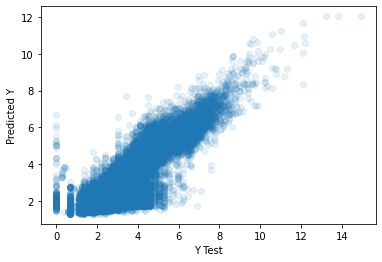

In [67]:
plt.scatter(y_test2,predictions2, alpha=0.1)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [68]:
print('MAE :'," ", metrics.mean_absolute_error(y_test2,predictions2))
print('MSE :'," ", metrics.mean_squared_error(y_test2,predictions2))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test2,predictions2)))
print('R2 :'," ", metrics.r2_score(y_test2,predictions2))

MAE :   0.43066222958155026
MSE :   0.3958216955963159
RMAE :   0.6291436208023696
R2 :   0.8233694669958679
